In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 79.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 13.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
#importing libs
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.graphics.api import qqplot
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import shapiro
from scipy import stats
import numpy as np

In [3]:
shareName = 'BHARATFORG.BO'            #stock name.
period = '25y'                         #timeframe
ticker = yf.Ticker(shareName)
dataset = ticker.history(period=period) #dataset variable.
dataset.reset_index(inplace=True)       #removing the existing index
dataset['Date'] = pd.to_datetime(dataset['Date']).dt.date                               #explanation of code for datetime function in the dataset (#dataframe is the input dataframe
dataset['Date'] = pd.to_datetime(dataset['Date'])                                       #to_datetime is the function used to convert datetime string to datetime
dataset.set_index('Date', inplace=True)#setting date as the index                       #DateTime is the datetime column in the dataframe
dataset.head()                                                                          #dt.date is used to convert datetime to date

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1998-03-09,5.168016,5.240296,5.059596,5.240296,472809,0.0,0.0
1998-03-10,5.276435,5.330645,4.987315,5.099349,278962,0.0,0.0
1998-03-11,5.059594,5.196926,4.915034,5.092120,272754,0.0,0.0
1998-03-12,5.041525,5.131874,4.936719,5.077665,462507,0.0,0.0
1998-03-13,5.077665,5.077665,5.077665,5.077665,0,0.0,0.0


In [4]:
#taking out closing value of the stock,
dataset_2=dataset.filter(['Close'])

dataset plot

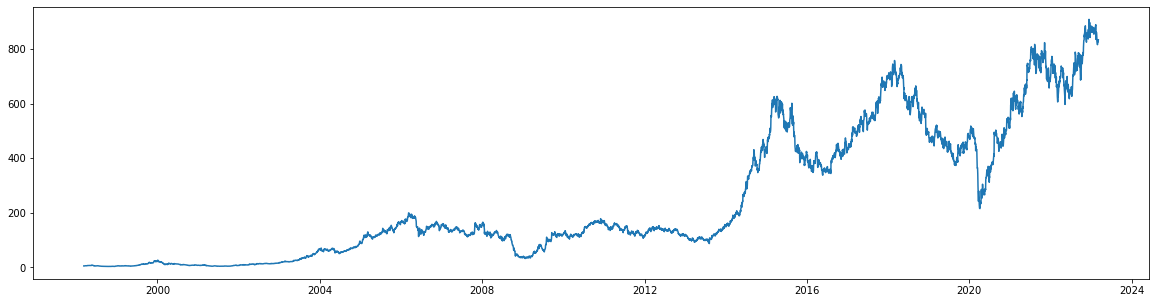

In [5]:
plt_dataset2 = plt.figure(figsize=(20, 5)) 
plt.plot(dataset_2)

In [6]:
dataset.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [7]:
#stats of the dataset
dataset.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,6269.000000,6269.000000,6269.000000,6269.000000,6.269000e+03,6269.000000,6269.000000
mean,240.872178,244.579220,236.469715,240.290361,2.661947e+05,0.008476,0.001117
std,240.903518,244.172832,237.045688,240.405925,5.161988e+05,0.134987,0.068011
min,3.324877,3.361016,0.004690,3.335718,0.000000e+00,0.000000,0.000000
25%,45.949807,48.116474,44.042535,45.385849,5.750600e+04,0.000000,0.000000
50%,135.844062,137.761307,133.276529,135.475815,1.218880e+05,0.000000,0.000000
75%,435.958458,442.177422,428.987253,435.301727,2.638140e+05,0.000000,0.000000
max,912.950012,919.500000,892.599976,908.849976,1.707567e+07,5.500000,5.000000


In [8]:
dataset_2.size

6269

stl plot

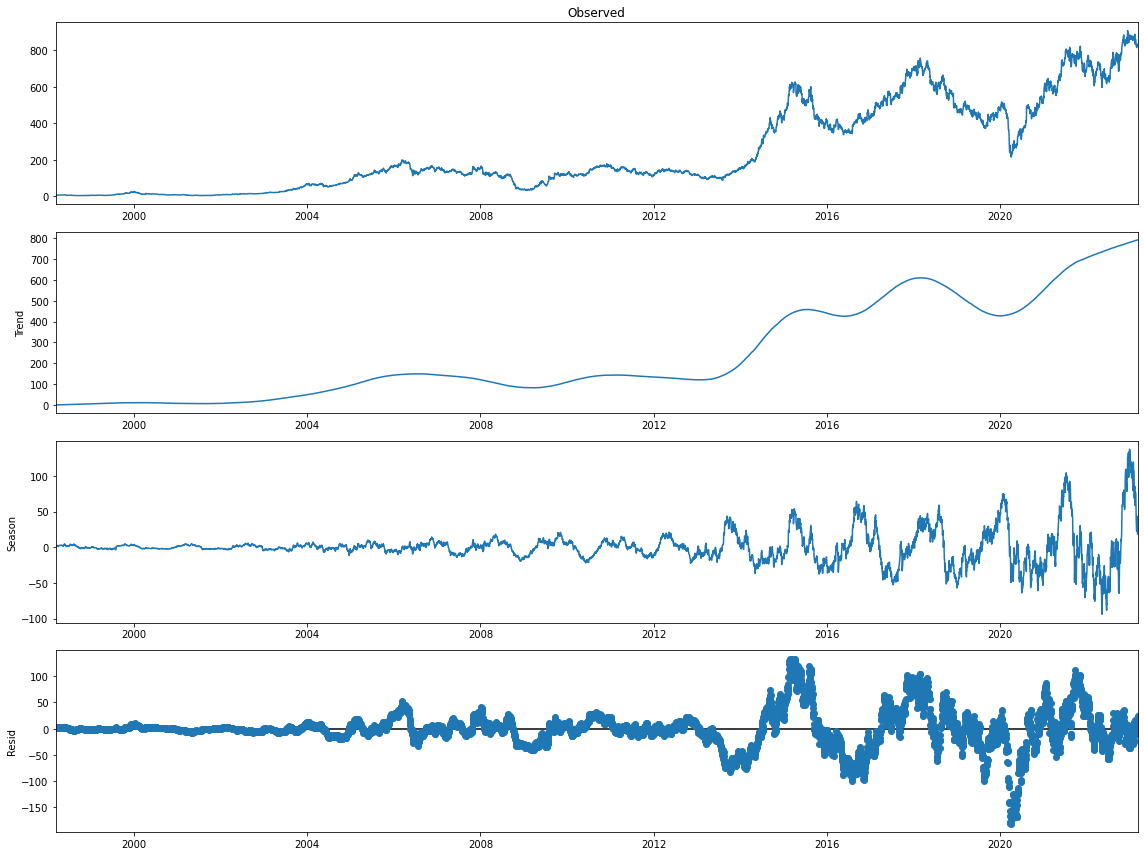

In [9]:
#stl decomposition

plt.rc("figure", figsize=(16, 12))

stl = STL(dataset_2, seasonal=7,period=365)

res=stl.fit()

fig_decompose = res.plot()


In [10]:
def adf_test(dataset_2):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(dataset_2, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [11]:
adf_test(dataset_2)

Results of Dickey-Fuller Test:
Test Statistic                    0.155216
p-value                           0.969635
#Lags Used                       32.000000
Number of Observations Used    6236.000000
Critical Value (1%)              -3.431399
Critical Value (5%)              -2.862004
Critical Value (10%)             -2.567017
dtype: float64


In [12]:
def kpss_test(dataset_2):
    print("Results of KPSS Test:")
    kpsstest = kpss(dataset_2, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [13]:
kpss_test(dataset_2)

Results of KPSS Test:
Test Statistic           10.751309
p-value                   0.010000
Lags Used                46.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


series is stationary


Taking the first difference for achieving stationary series







In [14]:
#taking the first difference
df_diff=dataset_2.diff().dropna()

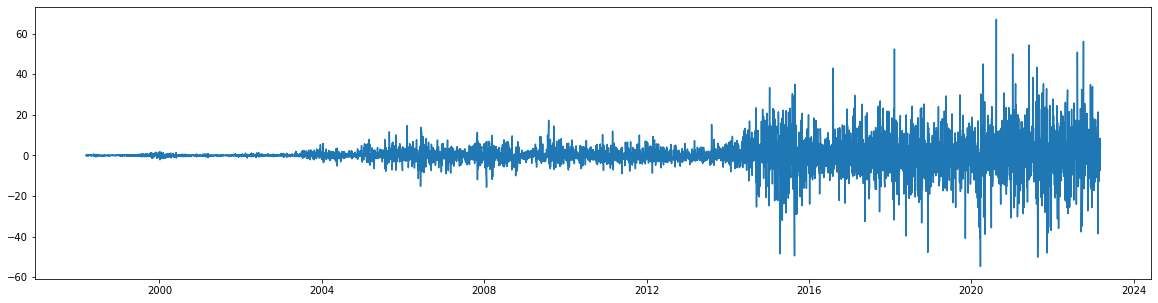

In [15]:
#visualising the differenced series
plt_diff = plt.figure(figsize=(20, 5)) 
plt.plot(df_diff)

train/test


In [16]:
testing_data, training_data = df_diff[len(df_diff)-1974:],df_diff[:len(df_diff)-1974]

In [17]:
training_data

,Close
Date,
1998-03-10,-0.140947
1998-03-11,-0.007229
1998-03-12,-0.014455
1998-03-13,0.000000
1998-03-16,0.502345
...,...
2015-03-05,12.452515
2015-03-09,-10.412354
2015-03-10,6.636780


In [18]:
testing_data

,Close
Date,
2015-03-13,-21.762756
2015-03-16,4.455688
2015-03-17,6.730530
2015-03-18,-5.839294
2015-03-19,4.596436
...,...
2023-03-01,8.049988
2023-03-02,8.450012
2023-03-03,-7.549988


pacf and acf

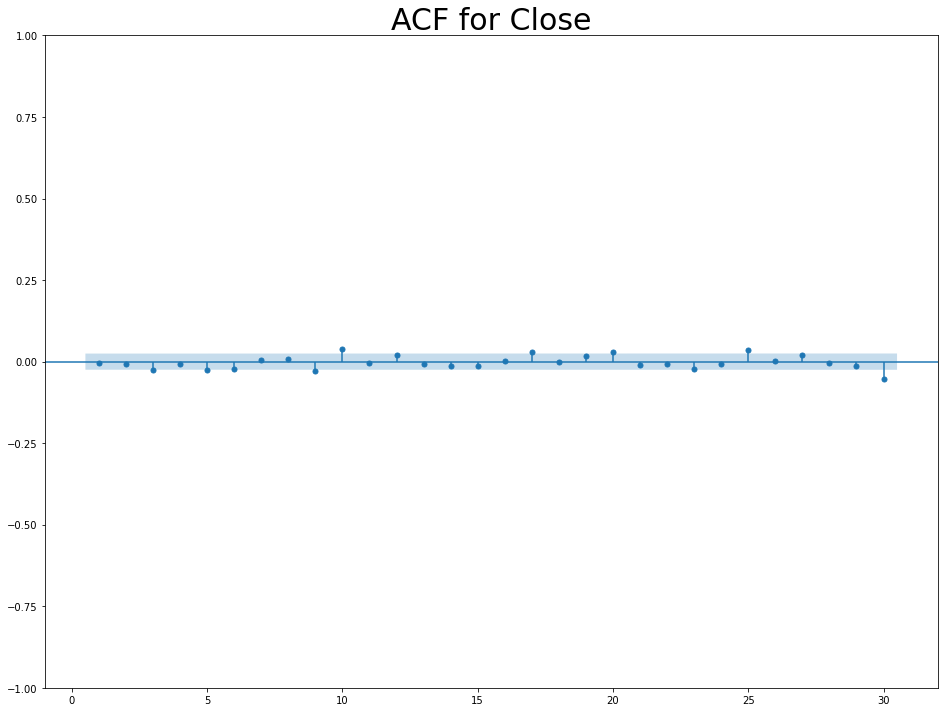

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_diff[1:], zero= False , lags=30);
plt.title("ACF for Close", size = 30)
plt.show()

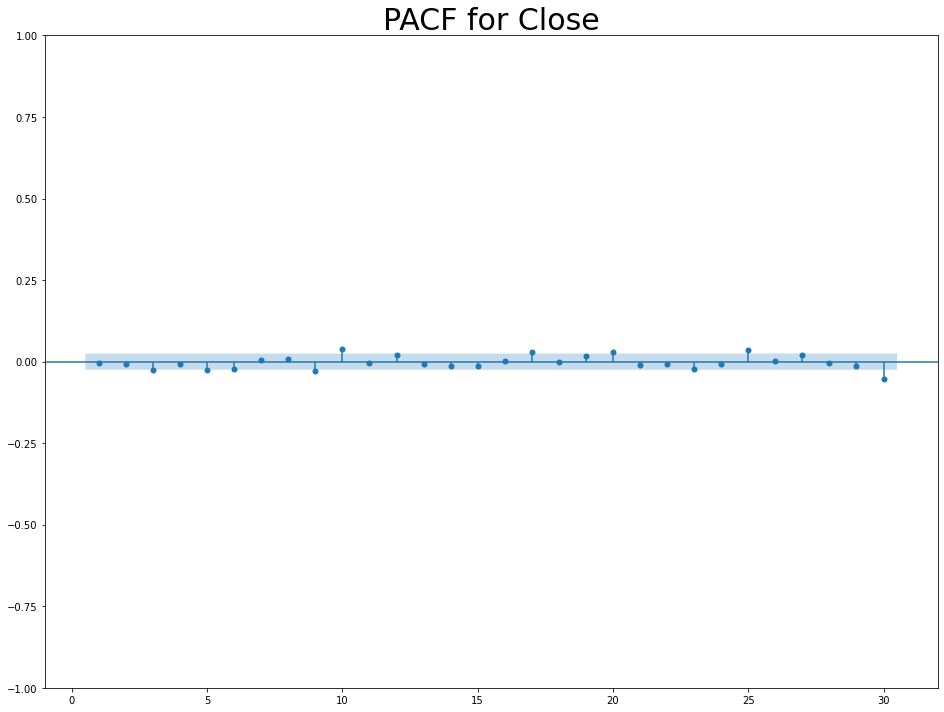

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(df_diff[1:], zero= False , lags=30);
plt.title("PACF for Close", size = 30)
plt.show()

In [21]:
model_arima= ARIMA(training_data,order=(2,1,2)).fit()
print(model_arima.params)

ar.L1    -0.953212
ar.L2     0.010954
ma.L1    -0.050527
ma.L2    -0.931361
sigma2    8.871269
dtype: float64


In [22]:
fitted_values = model_arima.fittedvalues

In [23]:
fitted_values_pd=pd.DataFrame(fitted_values)

In [24]:
training_data_pd=pd.DataFrame(training_data)

In [25]:
frame=[training_data_pd,fitted_values_pd]
df_concat=pd.concat(frame,ignore_index=False, sort=False)

In [26]:
df_concat

,Close,0
Date,,
1998-03-10,-0.140947,NaN
1998-03-11,-0.007229,NaN
1998-03-12,-0.014455,NaN
1998-03-13,0.000000,NaN
1998-03-16,0.502345,NaN
...,...,...
2015-03-05,NaN,1.982048
2015-03-09,NaN,1.688072
2015-03-10,NaN,2.497659


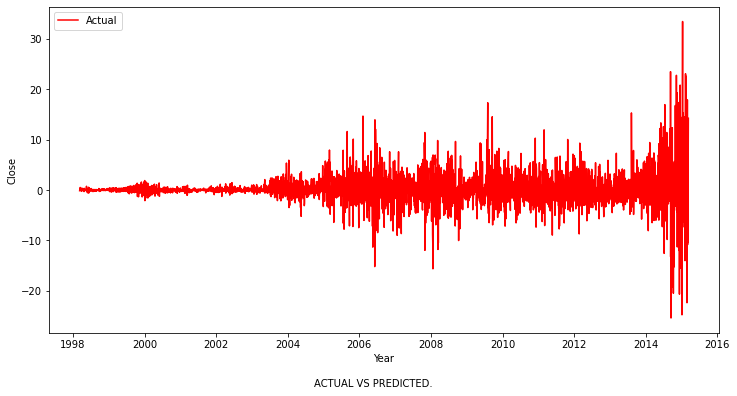

In [27]:
  fig2=plt.figure(figsize=(12,6))
  #plt.plot(df_concat[0],color='yellow',label='Predicted')
  plt.plot(df_concat['Close'],color='red',label='Actual')
  plt.xlabel('Year')
  plt.ylabel('Close')
  fig2.text(.5,.0001, s='ACTUAL VS PREDICTED.', ha='center')
  plt.legend()

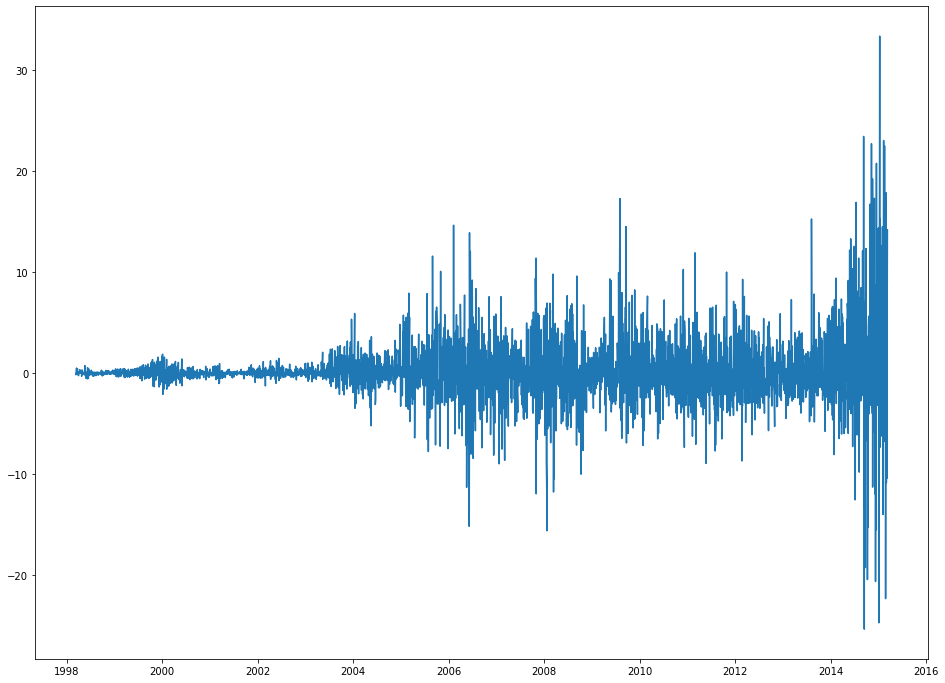

In [28]:
plt.plot(training_data)

In [29]:
print(model_arima.aic)

21567.92379238631


In [30]:
sm.stats.durbin_watson(model_arima.resid.values)

1.9963244355065874

durbin_watson indicated that residuals are not correlated as value is close to 2


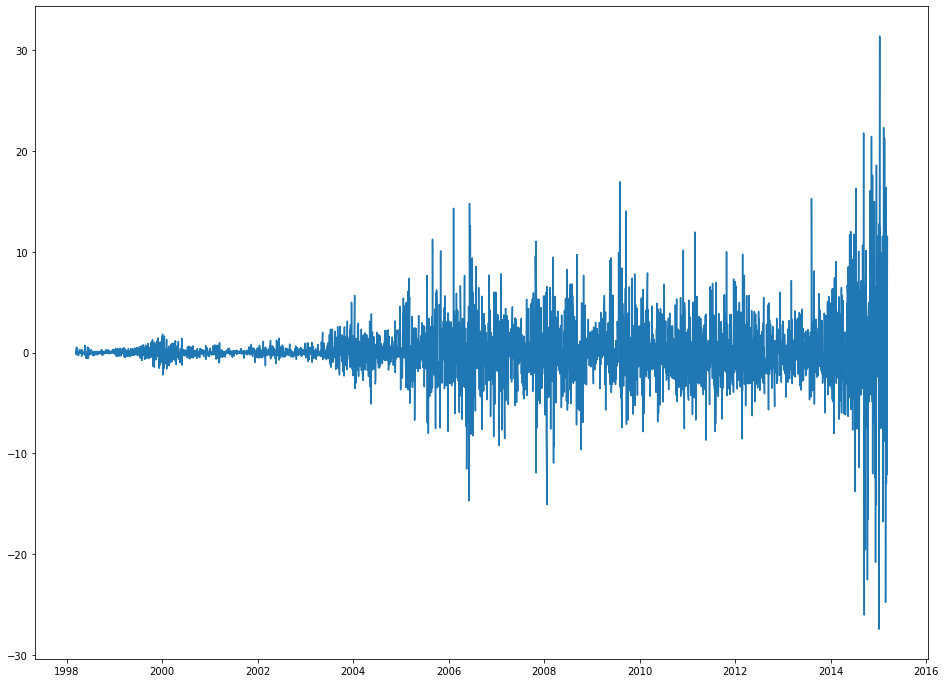

In [31]:
plt.plot(model_arima.resid)

In [32]:
w_statistic,p_value = shapiro(model_arima.resid)
print("w_stat",w_statistic)
print("p-value",p_value)
stats.normaltest(model_arima.resid)

w_stat 0.8005342483520508
p-value 0.0


NormaltestResult(statistic=1061.319618494479, pvalue=3.446458680302021e-231)

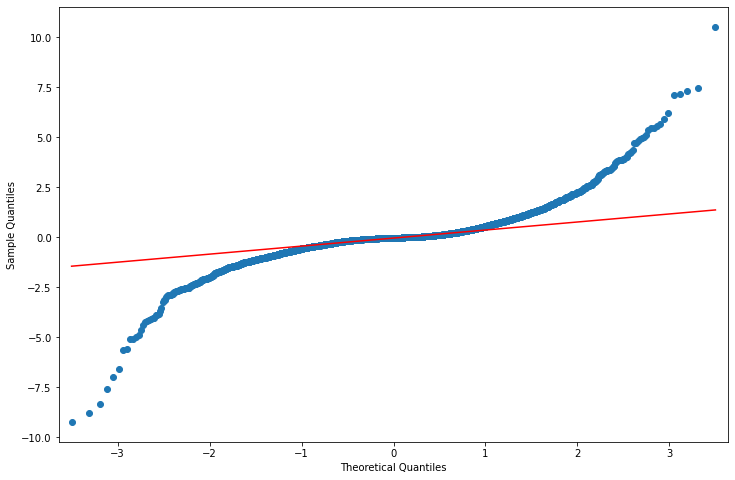

In [33]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)
fig = qqplot(model_arima.resid, line="q", ax=ax, fit=True)

In [34]:
#predict the test data
predictions = model_arima.predict(start=len(training_data),end=len(df_diff))

In [35]:
prediction_list_pd=pd.DataFrame(predictions)


prediction plot


In [36]:
testing_data['predicted'] = prediction_list_pd.values[1:]
testing_data

,Close,predicted
Date,,
2015-03-13,-21.762756,2.934414
2015-03-16,4.455688,1.349563
2015-03-17,6.730530,2.876864
2015-03-18,-5.839294,1.403663
2015-03-19,4.596436,2.824665
...,...,...
2023-03-01,8.049988,2.126978
2023-03-02,8.450012,2.126978
2023-03-03,-7.549988,2.126978


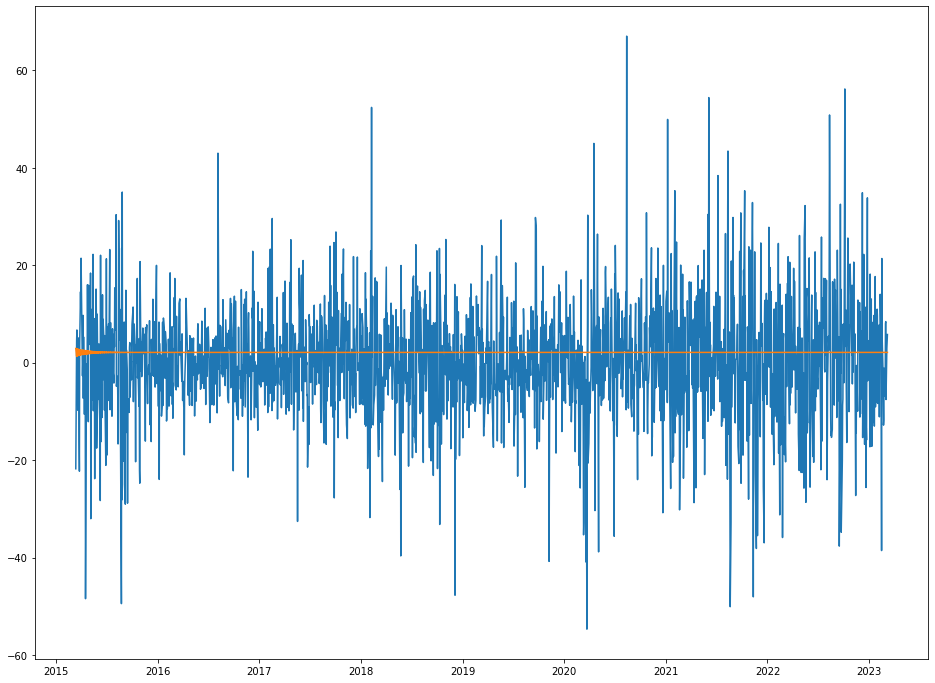

In [37]:
plt.plot(testing_data)

In [38]:
#results mse and rmse
mse = np.mean(model_arima.resid**2)
rmse = np.sqrt(mse)
print(mse)
print(rmse)



8.869289932126518
2.978135311252079


In [39]:
 from sklearn.metrics import mean_squared_error

In [40]:
mean_squared_error(training_data[:-1], model_arima.resid[:-1],squared=False)

0.40854878918638754